In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from micoes.experiment.utils import rename_experiment_compactdf_columns
from micoes.experiment.utils import merge_dataframe
from micoes.experiment.draw_chart import outlier_explanation_duration_by_dataset_chartv2
from micoes.experiment.draw_chart import outlier_explanation_matched_by_dataset_chartv2

import logging
logging.basicConfig(format='%(message)s', level=logging.INFO)

pd.set_option('display.float_format','{:.2f}'.format)
%matplotlib notebook
%matplotlib inline

In [2]:
df_clu= pd.read_pickle('evaluation_results/clu_5hst.pickle')
df_den = pd.read_pickle('evaluation_results/den_5hst.pickle')

In [3]:
clu_df = rename_experiment_compactdf_columns(df_clu, time_unit='second', microcluster_type='clu')
clu_df

NumExpr defaulting to 8 threads.


,stream name,n features,total data,total outliers,detection execution time (second),clu microcluster execution time (second),feature contribution execution time (second),clu-micoes execution time (second),coin execution time (second),clu-micoes over coin execution time (%),clu-micoes matched (%),coin matched (%)
0,wine,13,129,16,0.00,0.02,0.10,0.11,0.57,19.85,62.50,0.00
1,mammography,6,11183,1714,0.16,1.34,6.08,7.42,51.93,14.28,78.69,77.05
2,shuttle,9,49097,11020,0.99,11.95,100.21,112.17,493.46,22.73,47.94,56.40
3,smtp,3,95156,13561,1.60,13.58,129.09,142.67,523.00,27.28,83.33,87.50
4,http,3,567498,103323,10.59,135.66,1150.92,1286.60,4392.27,29.29,99.13,72.17


In [4]:
den_df = rename_experiment_compactdf_columns(df_den, time_unit='second', microcluster_type='den')
den_df

,stream name,n features,total data,total outliers,detection execution time (second),den microcluster execution time (second),feature contribution execution time (second),den-micoes execution time (second),coin execution time (second),den-micoes over coin execution time (%),den-micoes matched (%),coin matched (%)
0,wine,13,129,16,0.00,0.01,0.10,0.11,0.57,19.08,62.50,0.00
1,mammography,6,11183,1714,0.16,1.29,5.87,7.16,51.93,13.78,80.33,77.05
2,shuttle,9,49097,11020,0.99,3.04,74.35,77.39,493.46,15.68,70.11,56.40
3,smtp,3,95156,13561,1.60,4.35,63.62,67.97,523.00,13.00,100.00,87.50
4,http,3,567498,103323,10.59,27.43,562.67,590.13,4392.27,13.44,99.13,72.17


In [5]:
df = merge_dataframe(clu_df, den_df, time_unit='second')
print(df.columns)
clu_speed = df['clu-micoes execution time (second)']
den_speed = df['den-micoes execution time (second)']
coin_speed = df['coin execution time (second)']

print(f'\n den vs clu {clu_speed/den_speed}')
print(f'\n den vs coin {coin_speed/den_speed}')

Index(['stream name', 'n features', 'total data', 'total outliers',
       'coin execution time (second)', 'clu-micoes execution time (second)',
       'den-micoes execution time (second)',
       'clu-micoes over coin execution time (%)',
       'den-micoes over coin execution time (%)', 'coin matched (%)',
       'clu-micoes matched (%)', 'den-micoes matched (%)'],
      dtype='object')

 den vs clu 0   1.04
1   1.04
2   1.45
3   2.10
4   2.18
dtype: float64

 den vs coin 0   5.24
1   7.26
2   6.38
3   7.69
4   7.44
dtype: float64


In [6]:
clu_accuracy = df['clu-micoes matched (%)']
den_accuracy = df['den-micoes matched (%)']
coin_accuracy = df['coin matched (%)']
print(f'\n den vs clu {den_accuracy-clu_accuracy}')
print(f'\n den vs coin {den_accuracy-coin_accuracy}')


 den vs clu 0    0.00
1    1.64
2   22.17
3   16.67
4    0.00
dtype: float64

 den vs coin 0   62.50
1    3.28
2   13.71
3   12.50
4   26.96
dtype: float64


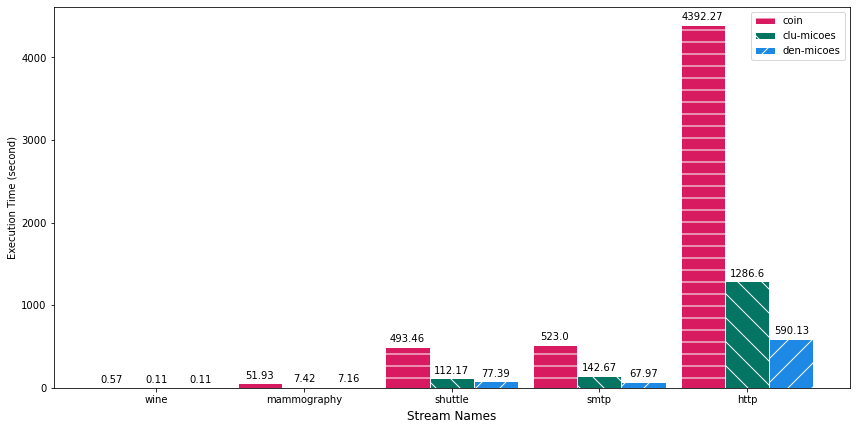

In [7]:
outlier_explanation_duration_by_dataset_chartv2(df, 
                                                time_unit='second', 
                                                colors=('#D81B60', '#047562', '#1E88E5'), 
                                                hatch=('-', '\\', '/'), 
                                                figwidth=6, 
                                                figheight=6)

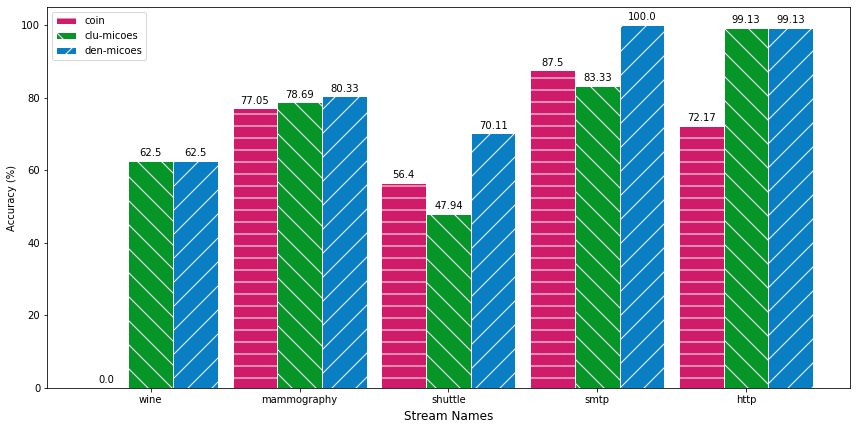

In [8]:
outlier_explanation_matched_by_dataset_chartv2(df, 
                                               time_unit='second', 
                                               colors=('#cf1b69', '#059627', '#0a7ec2'), 
                                               hatch=('-', '\\', '/'), 
                                               figwidth=6, 
                                               figheight=6)